In [2]:
# Compare the results from ../logs/normalization_fix/cyclic_without_size_factor/train_test_rmse.csv and ../logs/normalization_fix/new/train_test_rmse.csv
# to see the effect of adding size factor to the cyclic learning rate schedule
import numpy as np
import pandas as pd

cyclic_without_size_factor_df = pd.read_csv("../../logs/normalization_fix/cyclic_without_size_factor/train_test_rmse.csv")
cyclic_with_size_factor_df = pd.read_csv("../../logs/normalization_fix/new/train_test_rmse.csv")

In [3]:
cyclic_without_size_factor_df.head()

,num_processes,num_iterations,max_iterations,batch_size,activation,learning_rate,train_rmse,test_rmse,train_time_max,train_time_avg,test_time_max,test_time_avg,total_time_max,total_time_avg
0,1,22414,1000000,16,relu,0.000193,0.700831,0.660909,22.716086,22.716086,18.653706,18.653706,41.369792,41.369792
1,1,4209,1000000,16,tanh,0.000070,0.859693,0.859981,30.227318,30.227318,18.686102,18.686102,48.913422,48.913422
2,1,58001,1000000,16,sigmoid,0.000162,0.628705,0.628659,45.505857,45.505857,21.071586,21.071586,66.577446,66.577446
3,1,92827,1000000,16,leaky_relu,0.000175,0.477185,0.458859,47.855433,47.855433,17.270918,17.270918,65.126353,65.126353
4,1,25869,1000000,16,elu,0.000076,0.512824,0.501336,23.020732,23.020732,14.310571,14.310571,37.331304,37.331304


In [5]:
cyclic_with_size_factor_df.head()

,num_processes,num_iterations,max_iterations,batch_size,activation,learning_rate,train_rmse,test_rmse,train_time_max,train_time_avg,test_time_max,test_time_avg,total_time_max,total_time_avg
0,2,74738,1000000,16,relu,0.000050,0.367029,0.359936,37.149301,37.149018,10.378376,10.378086,47.527506,47.527496
1,2,53363,1000000,16,tanh,0.000259,0.285754,0.285468,25.782739,25.782678,16.523891,16.523804,42.306632,42.306483
2,2,8141,1000000,16,sigmoid,0.000293,0.698112,0.698130,17.104594,17.104498,14.695502,14.695303,31.799906,31.799802
3,2,27907,1000000,16,leaky_relu,0.000328,0.426492,0.422506,19.471027,19.470956,9.699771,9.699770,29.170798,29.170727
4,2,66996,1000000,16,elu,0.000313,0.313160,0.311594,44.289212,44.289133,13.842583,13.842332,58.131767,58.131595


    batch_size  activation  train_rmse_without_size_factor  \
4           16         elu                        0.345933   
3           16  leaky_relu                        0.473347   
0           16        relu                        0.490583   
2           16     sigmoid                        0.722709   
1           16        tanh                        0.267450   
9           32         elu                        0.454533   
8           32  leaky_relu                        0.494671   
5           32        relu                        0.776242   
7           32     sigmoid                        0.601735   
6           32        tanh                        0.291998   
14          64         elu                        0.536141   
13          64  leaky_relu                        0.659176   
10          64        relu                        0.475630   
12          64     sigmoid                        0.724949   
11          64        tanh                        0.557824   
19      

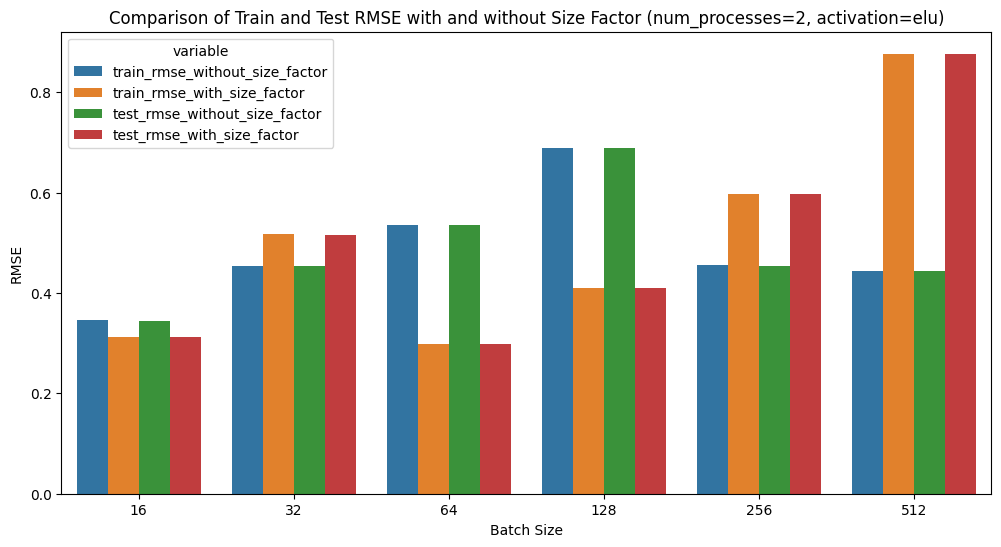

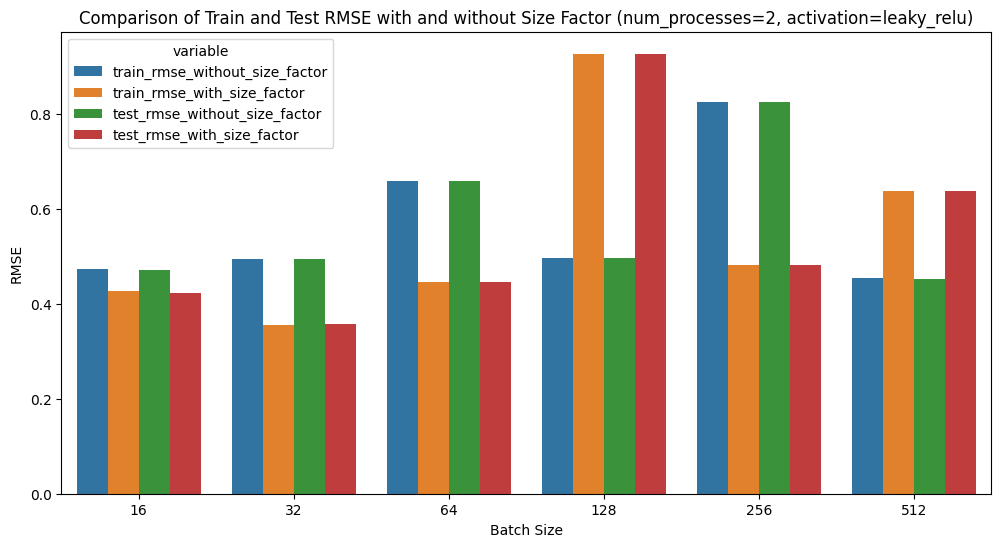

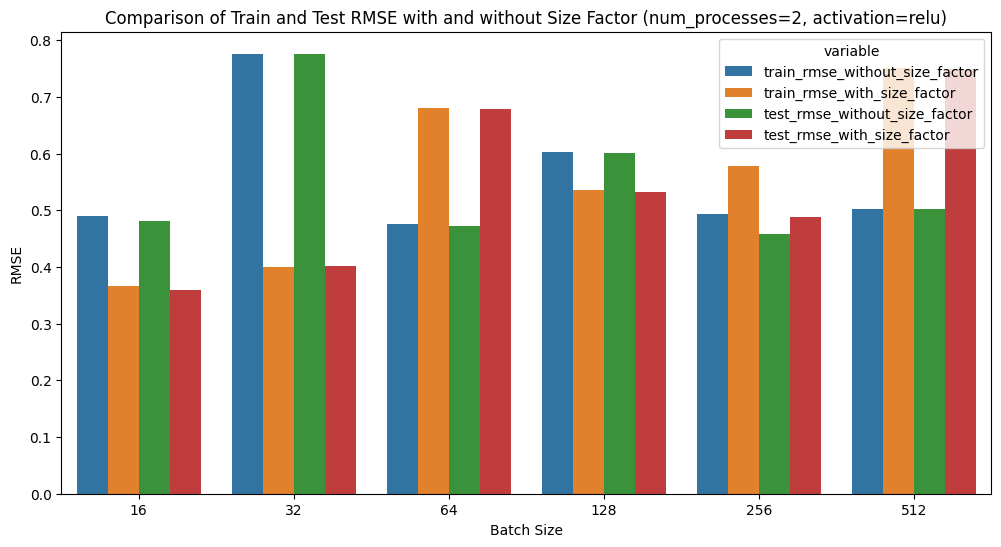

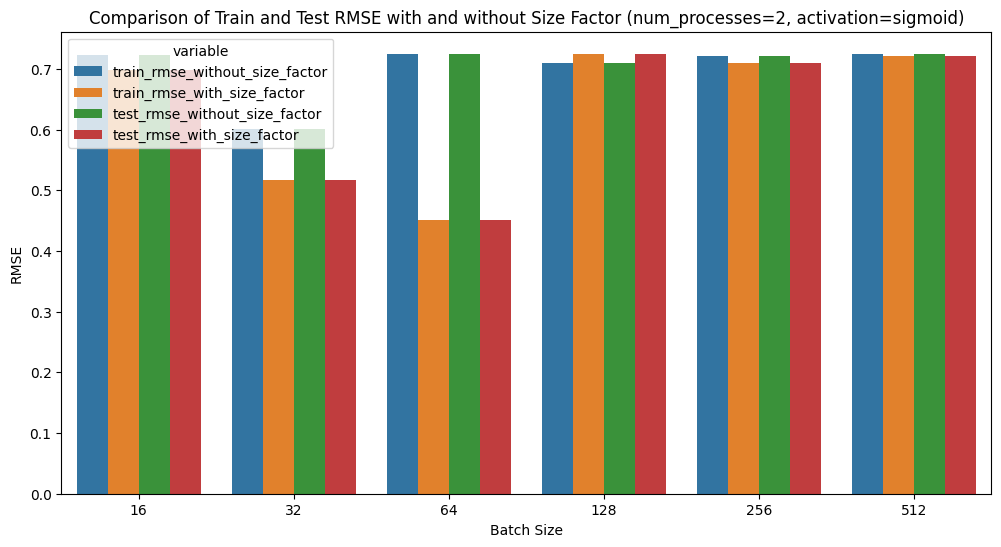

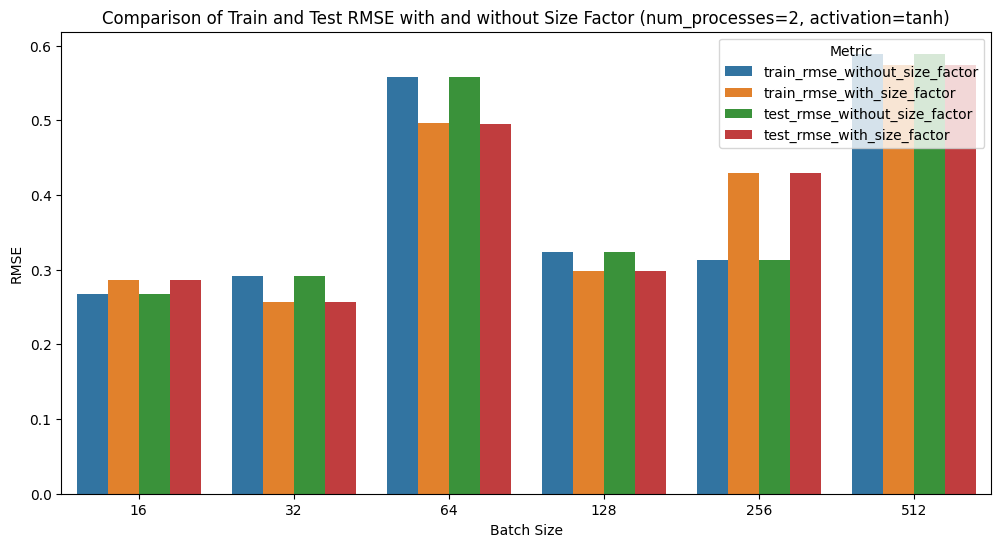

In [18]:
# compare the results for num_processes = 2 between the two dataframes
# group the comparison by batch size and activation 
# make a table to show the comparison
# and plot the comparison using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
comparison_df = pd.merge(cyclic_without_size_factor_df, cyclic_with_size_factor_df, on=['num_processes', 'batch_size', 'activation'], suffixes=('_without_size_factor', '_with_size_factor'))
comparison_df = comparison_df[comparison_df['num_processes'] == 2]
comparison_df = comparison_df[['batch_size', 'activation', 'train_rmse_without_size_factor', 'test_rmse_without_size_factor', 'train_rmse_with_size_factor', 'test_rmse_with_size_factor']]
comparison_df = comparison_df.sort_values(by=['batch_size', 'activation'])
print(comparison_df)    
# plot the comparison - I want one plot per activation function, with batch size on the x axis and RMSE on the y axis
# with different colors for train and test RMSE, and with and without size factor
for activation in comparison_df['activation'].unique():
    plt.figure(figsize=(12, 6))
    sns.barplot(data=comparison_df[comparison_df['activation'] == activation].melt(id_vars=['batch_size'], value_vars=['train_rmse_without_size_factor', 'train_rmse_with_size_factor', 'test_rmse_without_size_factor', 'test_rmse_with_size_factor']), x='batch_size', y='value', hue='variable')
    plt.title(f'Comparison of Train and Test RMSE with and without Size Factor (num_processes=2, activation={activation})')
    plt.xlabel('Batch Size')
    plt.ylabel('RMSE')
plt.legend(title='Metric', loc='upper right')
plt.show()

    batch_size  activation  train_time_max_without_size_factor  \
4           16         elu                           56.465616   
3           16  leaky_relu                           39.881378   
0           16        relu                           47.541970   
2           16     sigmoid                           37.619278   
1           16        tanh                          123.045821   
9           32         elu                           62.169777   
8           32  leaky_relu                           50.120190   
5           32        relu                           27.088447   
7           32     sigmoid                           27.860089   
6           32        tanh                           62.259586   
14          64         elu                           37.548158   
13          64  leaky_relu                           51.688892   
10          64        relu                           64.937241   
12          64     sigmoid                           41.942160   
11        

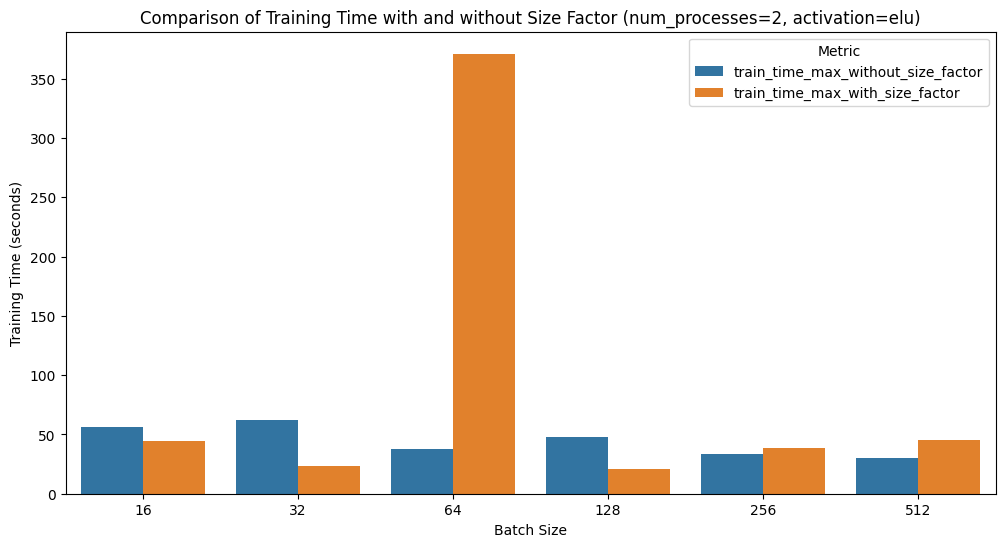

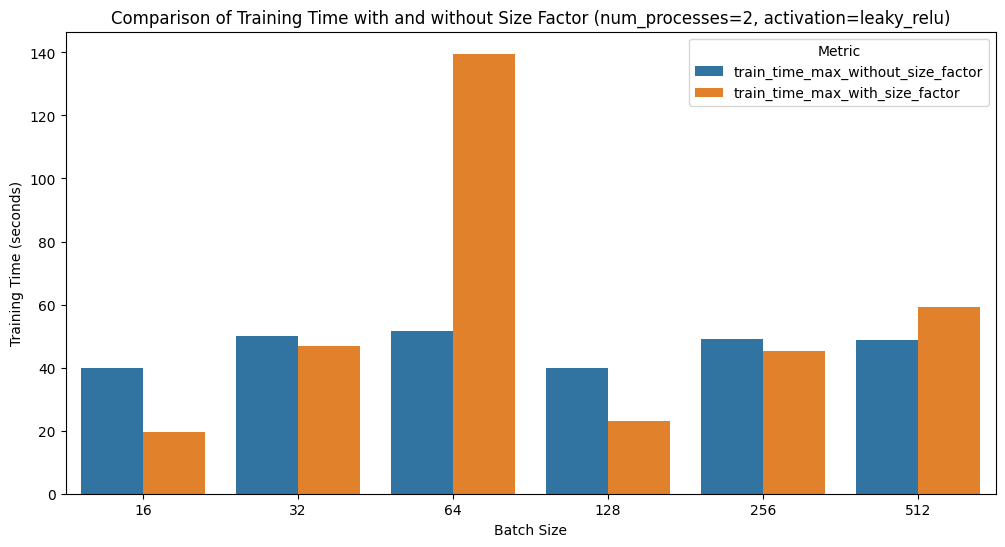

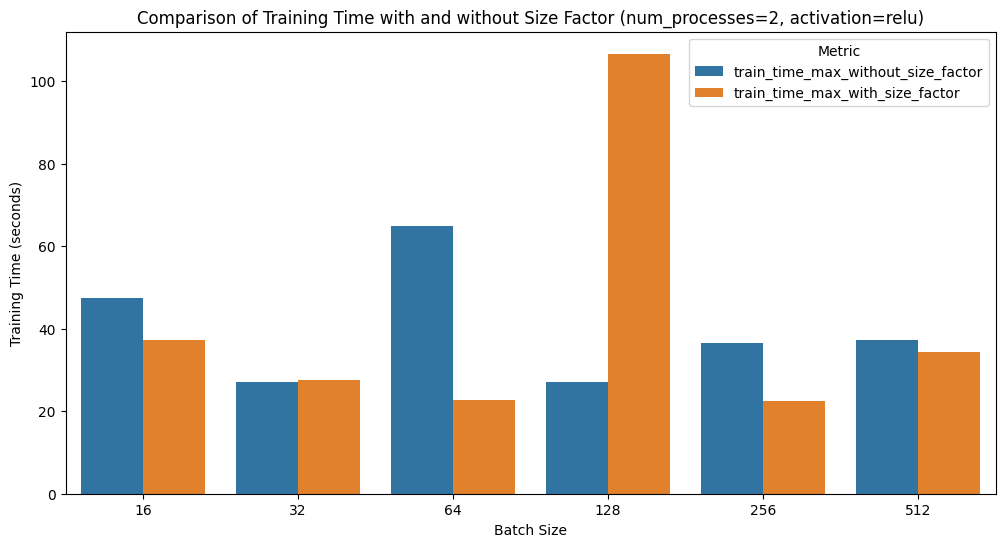

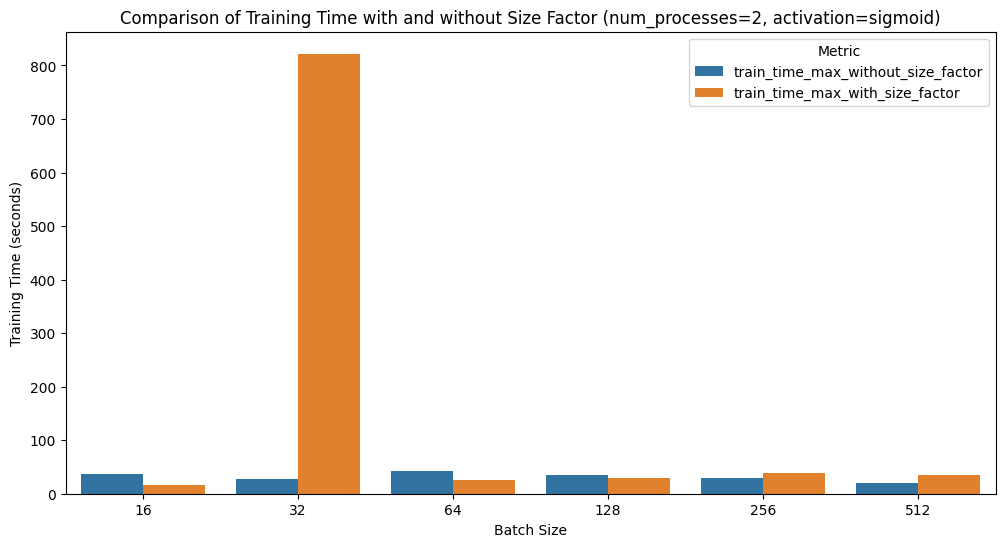

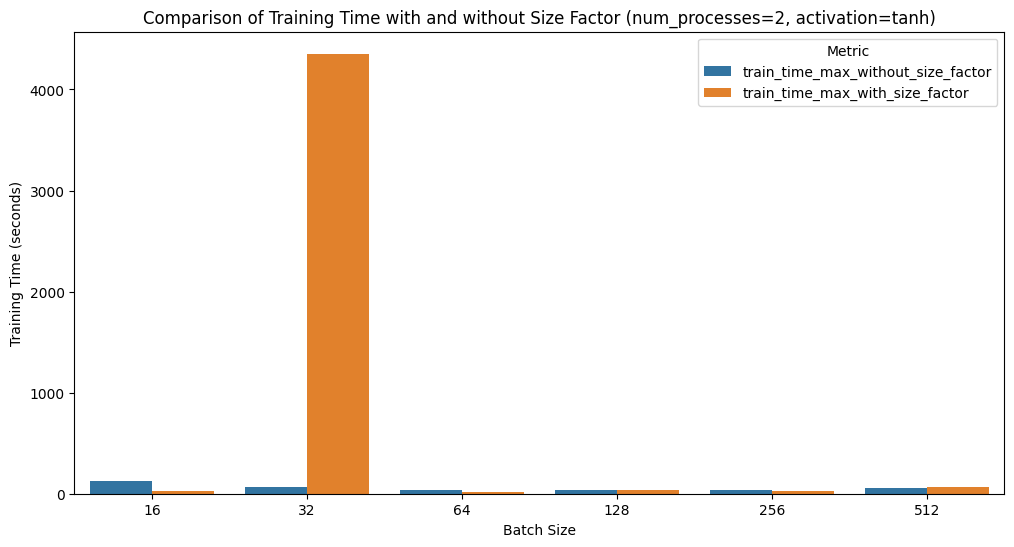

In [17]:
# Same as above, do the comparison for the training time and plot the comparison
# this time group by batch size alone
comparison_time_df = pd.merge(cyclic_without_size_factor_df, cyclic_with_size_factor_df, on=['num_processes', 'batch_size', 'activation'], suffixes=('_without_size_factor', '_with_size_factor'))
comparison_time_df = comparison_time_df[comparison_time_df['num_processes'] == 2]
comparison_time_df = comparison_time_df[['batch_size', 'activation', 'train_time_max_without_size_factor', 'train_time_max_with_size_factor']]
comparison_time_df = comparison_time_df.sort_values(by=['batch_size', 'activation'])
print(comparison_time_df)    
# plot the comparison by activation function - I need one plot per activation function so iterate over the unique activation functions
for activation in comparison_time_df['activation'].unique():
    plt.figure(figsize=(12, 6))
    sns.barplot(data=comparison_time_df[comparison_time_df['activation'] == activation].melt(id_vars=['batch_size'], value_vars=['train_time_max_without_size_factor', 'train_time_max_with_size_factor']), x='batch_size', y='value', hue='variable')
    plt.title(f'Comparison of Training Time with and without Size Factor (num_processes=2, activation={activation})')
    plt.xlabel('Batch Size')
    plt.ylabel('Training Time (seconds)')
    plt.legend(title='Metric', loc='upper right')
    plt.show()

    batch_size  activation  train_time_max_without_size_factor  \
4           16         elu                           23.020732   
3           16  leaky_relu                           47.855433   
0           16        relu                           22.716086   
2           16     sigmoid                           45.505857   
1           16        tanh                           30.227318   
9           32         elu                           72.511373   
8           32  leaky_relu                           79.991232   
5           32        relu                           32.400402   
7           32     sigmoid                           60.370712   
6           32        tanh                           17.922627   
14          64         elu                          235.887988   
13          64  leaky_relu                           59.259290   
10          64        relu                           45.413171   
12          64     sigmoid                           76.700813   
11        

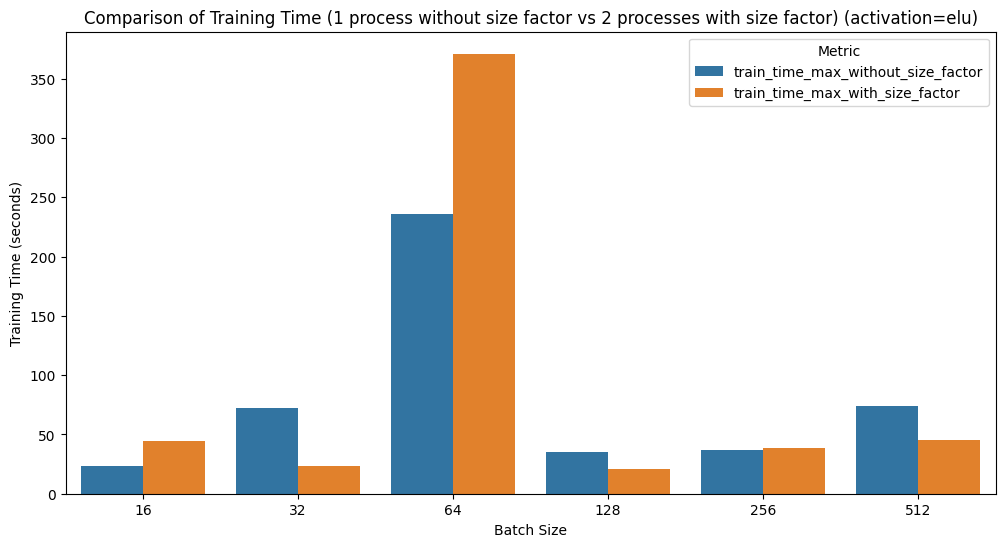

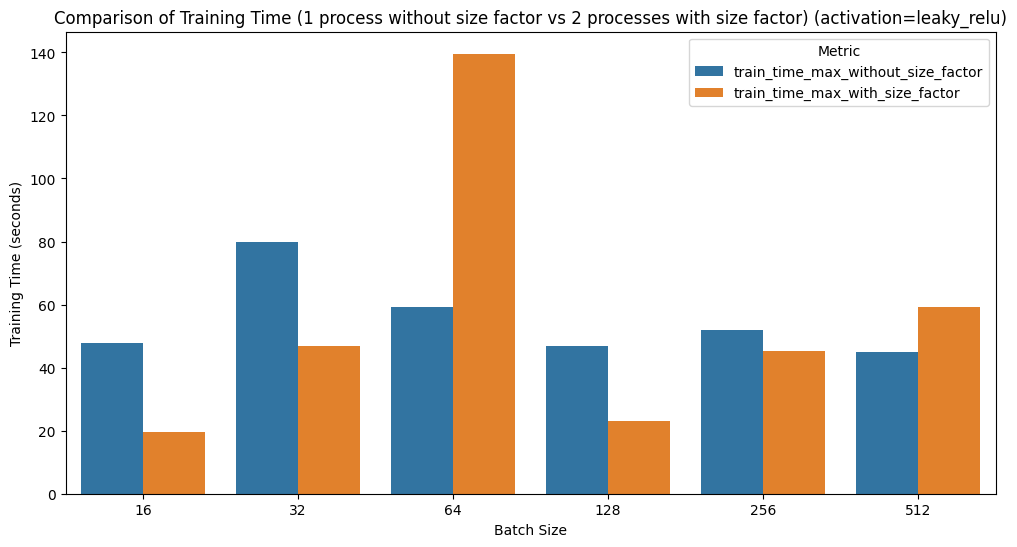

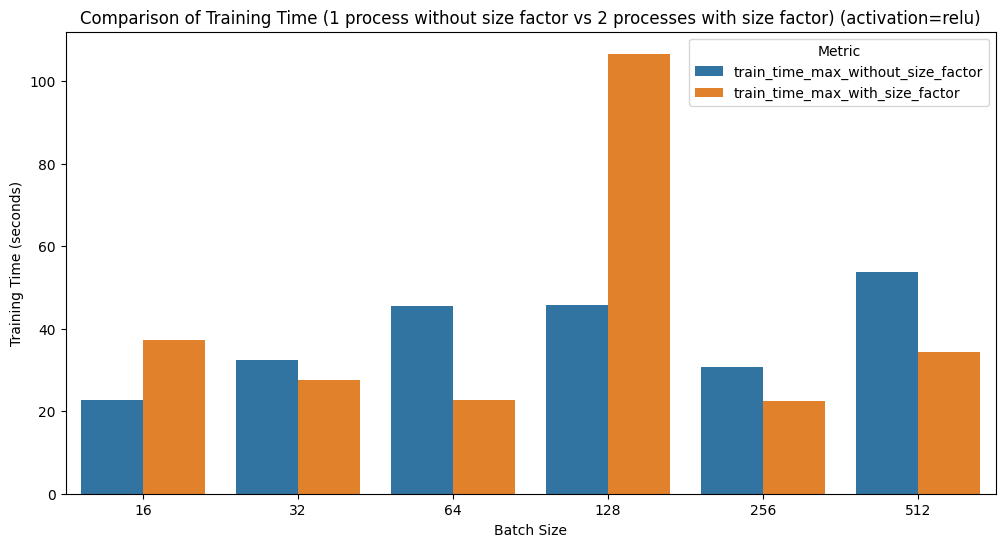

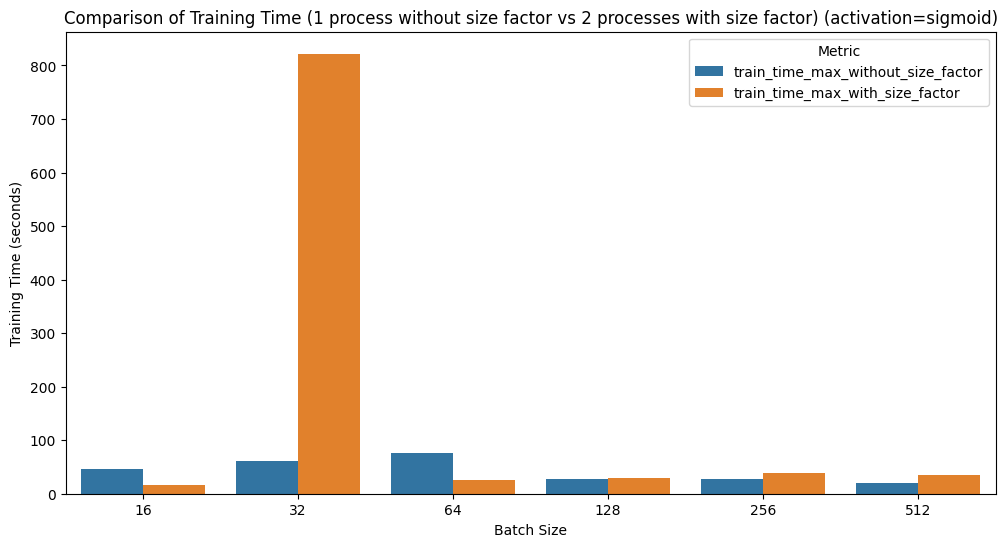

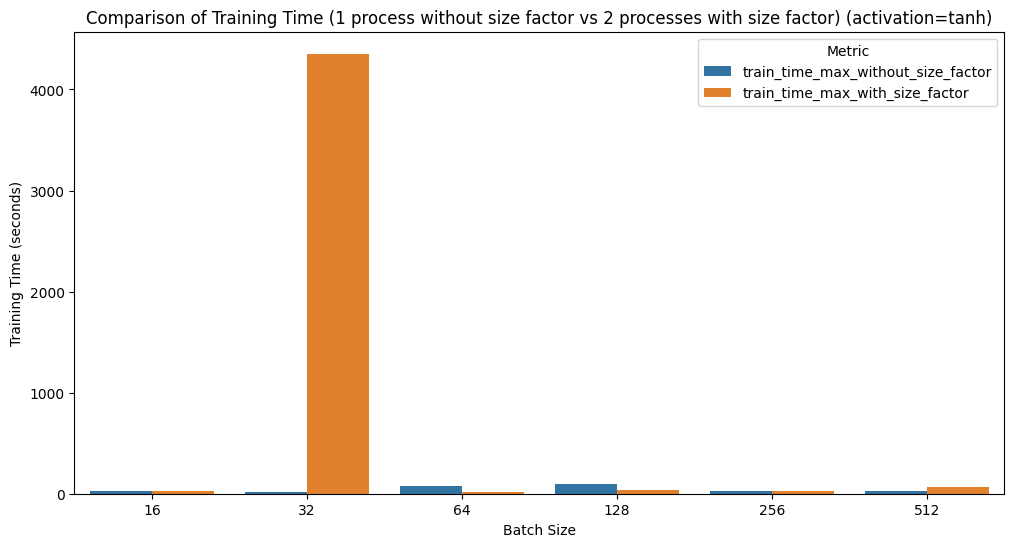

In [19]:
# compare the train_time_max for num_processes=1 from cyclic_without_size_factor_df to num_processes = 2 from cyclic_with_size_factor_df
comparison_single_df = pd.merge(cyclic_without_size_factor_df, cyclic_with_size_factor_df, on=['batch_size', 'activation'], suffixes=('_without_size_factor', '_with_size_factor'))
comparison_single_df = comparison_single_df[(comparison_single_df['num_processes_without_size_factor'] == 1) & (comparison_single_df['num_processes_with_size_factor'] == 2)]
comparison_single_df = comparison_single_df[['batch_size', 'activation', 'train_time_max_without_size_factor', 'train_time_max_with_size_factor']]
comparison_single_df = comparison_single_df.sort_values(by=['batch_size', 'activation'])
print(comparison_single_df)    
# plot the comparison by activation function - I need one plot per activation function so iterate over the unique activation functions
for activation in comparison_single_df['activation'].unique():
    plt.figure(figsize=(12, 6))
    sns.barplot(data=comparison_single_df[comparison_single_df['activation'] == activation].melt(id_vars=['batch_size'], value_vars=['train_time_max_without_size_factor', 'train_time_max_with_size_factor']), x='batch_size', y='value', hue='variable')
    plt.title(f'Comparison of Training Time (1 process without size factor vs 2 processes with size factor) (activation={activation})')
    plt.xlabel('Batch Size')
    plt.ylabel('Training Time (seconds)')
    plt.legend(title='Metric', loc='upper right')
    plt.show() 